# Worksheet Practical 1 & 2
## Problem Statement - Build a multivariate Ordinary Least Squares regression model to predict "TARGET_deathRate"

### Submitted by Ayush Mudgal (18BCS6124)

# Importing Libraries and creating a Data Frame

In [1]:
#Ignoring warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Reading the csv file into a dataframe
df = pd.read_csv('https://query.data.world/s/xlh353wvypzveoxm7h4u4c6hnucftk',encoding='latin-1')

In [4]:
#Displaying first 5 rows of the dataframe
df.head()

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
0,1397.0,469,164.9,489.8,61898,260131,11.2,499.748204,"(61494.5, 125635]",39.3,...,NaN,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831
1,173.0,70,161.3,411.6,48127,43269,18.6,23.111234,"(48021.6, 51046.4]",33.0,...,53.8,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096
2,102.0,50,174.7,349.7,49348,21026,14.6,47.560164,"(48021.6, 51046.4]",45.0,...,43.5,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488
3,427.0,202,194.8,430.4,44243,75882,17.1,342.637253,"(42724.4, 45201]",42.8,...,40.3,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841
4,57.0,26,144.4,350.1,49955,10321,12.5,0.000000,"(48021.6, 51046.4]",48.3,...,43.9,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657


In [5]:
#Checking the shape of the dataframe
df.shape

(3047, 34)

In [6]:
#Checking the information of every column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3047 entries, 0 to 3046
Data columns (total 34 columns):
avgAnnCount                3047 non-null float64
avgDeathsPerYear           3047 non-null int64
TARGET_deathRate           3047 non-null float64
incidenceRate              3047 non-null float64
medIncome                  3047 non-null int64
popEst2015                 3047 non-null int64
povertyPercent             3047 non-null float64
studyPerCap                3047 non-null float64
binnedInc                  3047 non-null object
MedianAge                  3047 non-null float64
MedianAgeMale              3047 non-null float64
MedianAgeFemale            3047 non-null float64
Geography                  3047 non-null object
AvgHouseholdSize           3047 non-null float64
PercentMarried             3047 non-null float64
PctNoHS18_24               3047 non-null float64
PctHS18_24                 3047 non-null float64
PctSomeCol18_24            762 non-null float64
PctBachDeg18_24     

# Data Cleaning

### From the info() function, we can see that the columns: PctSomeCol18_24, PctEmployed16_Over and PctPrivateCoverageAlone have missing values

In [7]:
#Finding the number of NULL values in each column
df.isnull().sum()

avgAnnCount                   0
avgDeathsPerYear              0
TARGET_deathRate              0
incidenceRate                 0
medIncome                     0
popEst2015                    0
povertyPercent                0
studyPerCap                   0
binnedInc                     0
MedianAge                     0
MedianAgeMale                 0
MedianAgeFemale               0
Geography                     0
AvgHouseholdSize              0
PercentMarried                0
PctNoHS18_24                  0
PctHS18_24                    0
PctSomeCol18_24            2285
PctBachDeg18_24               0
PctHS25_Over                  0
PctBachDeg25_Over             0
PctEmployed16_Over          152
PctUnemployed16_Over          0
PctPrivateCoverage            0
PctPrivateCoverageAlone     609
PctEmpPrivCoverage            0
PctPublicCoverage             0
PctPublicCoverageAlone        0
PctWhite                      0
PctBlack                      0
PctAsian                      0
PctOther

In [8]:
#Finding the pertcentage of missing values in columns
df.isnull().sum()/len(df)*100

avgAnnCount                 0.000000
avgDeathsPerYear            0.000000
TARGET_deathRate            0.000000
incidenceRate               0.000000
medIncome                   0.000000
popEst2015                  0.000000
povertyPercent              0.000000
studyPerCap                 0.000000
binnedInc                   0.000000
MedianAge                   0.000000
MedianAgeMale               0.000000
MedianAgeFemale             0.000000
Geography                   0.000000
AvgHouseholdSize            0.000000
PercentMarried              0.000000
PctNoHS18_24                0.000000
PctHS18_24                  0.000000
PctSomeCol18_24            74.991795
PctBachDeg18_24             0.000000
PctHS25_Over                0.000000
PctBachDeg25_Over           0.000000
PctEmployed16_Over          4.988513
PctUnemployed16_Over        0.000000
PctPrivateCoverage          0.000000
PctPrivateCoverageAlone    19.986872
PctEmpPrivCoverage          0.000000
PctPublicCoverage           0.000000
P

### Here we see that PctSomeCol18_24 has 74.99% values missing. Hence we will remove this column.

In [9]:
df = df.drop(['PctSomeCol18_24'],axis=1)

In [10]:
df.isnull().sum()/len(df)*100

avgAnnCount                 0.000000
avgDeathsPerYear            0.000000
TARGET_deathRate            0.000000
incidenceRate               0.000000
medIncome                   0.000000
popEst2015                  0.000000
povertyPercent              0.000000
studyPerCap                 0.000000
binnedInc                   0.000000
MedianAge                   0.000000
MedianAgeMale               0.000000
MedianAgeFemale             0.000000
Geography                   0.000000
AvgHouseholdSize            0.000000
PercentMarried              0.000000
PctNoHS18_24                0.000000
PctHS18_24                  0.000000
PctBachDeg18_24             0.000000
PctHS25_Over                0.000000
PctBachDeg25_Over           0.000000
PctEmployed16_Over          4.988513
PctUnemployed16_Over        0.000000
PctPrivateCoverage          0.000000
PctPrivateCoverageAlone    19.986872
PctEmpPrivCoverage          0.000000
PctPublicCoverage           0.000000
PctPublicCoverageAlone      0.000000
P

### Since the columns PctEmployed16_Over and PctPrivateCoverageAlone don't have as many missing values we will put replace the NULL values with their mean values.

In [11]:
df[['PctEmployed16_Over','PctPrivateCoverageAlone']].describe()

,PctEmployed16_Over,PctPrivateCoverageAlone
count,2895.000000,2438.000000
mean,54.152642,48.453774
std,8.315064,10.083006
min,17.600000,15.700000
25%,48.600000,41.000000
50%,54.500000,48.700000
75%,60.300000,55.600000
max,80.100000,78.900000


#### Mean of PctEmployed16_Over        = 54.152642
#### Mean of PctPrivateCoverageAlone = 48.453774

In [12]:
#Replacing null values with mean
df['PctEmployed16_Over'].fillna(54.152642,inplace=True)
df['PctPrivateCoverageAlone'].fillna(48.453774,inplace=True)

In [13]:
#Checking is there are still missing values in the dataframe
df.isnull().sum()/len(df)*100

avgAnnCount                0.0
avgDeathsPerYear           0.0
TARGET_deathRate           0.0
incidenceRate              0.0
medIncome                  0.0
popEst2015                 0.0
povertyPercent             0.0
studyPerCap                0.0
binnedInc                  0.0
MedianAge                  0.0
MedianAgeMale              0.0
MedianAgeFemale            0.0
Geography                  0.0
AvgHouseholdSize           0.0
PercentMarried             0.0
PctNoHS18_24               0.0
PctHS18_24                 0.0
PctBachDeg18_24            0.0
PctHS25_Over               0.0
PctBachDeg25_Over          0.0
PctEmployed16_Over         0.0
PctUnemployed16_Over       0.0
PctPrivateCoverage         0.0
PctPrivateCoverageAlone    0.0
PctEmpPrivCoverage         0.0
PctPublicCoverage          0.0
PctPublicCoverageAlone     0.0
PctWhite                   0.0
PctBlack                   0.0
PctAsian                   0.0
PctOtherRace               0.0
PctMarriedHouseholds       0.0
BirthRat

We can see that there is no missing values in the dataframe now. This is where the process of Data Cleaning has been completed

# Data Visualization

Since there are still 33 columns in the dataframe, we won't make the pairplots of every single column with each other as that will be a lot of columns. Therefore we will only plot the scatter plots of the columns which have relatively higher correlation with the target variable ie TARGET_deathRate

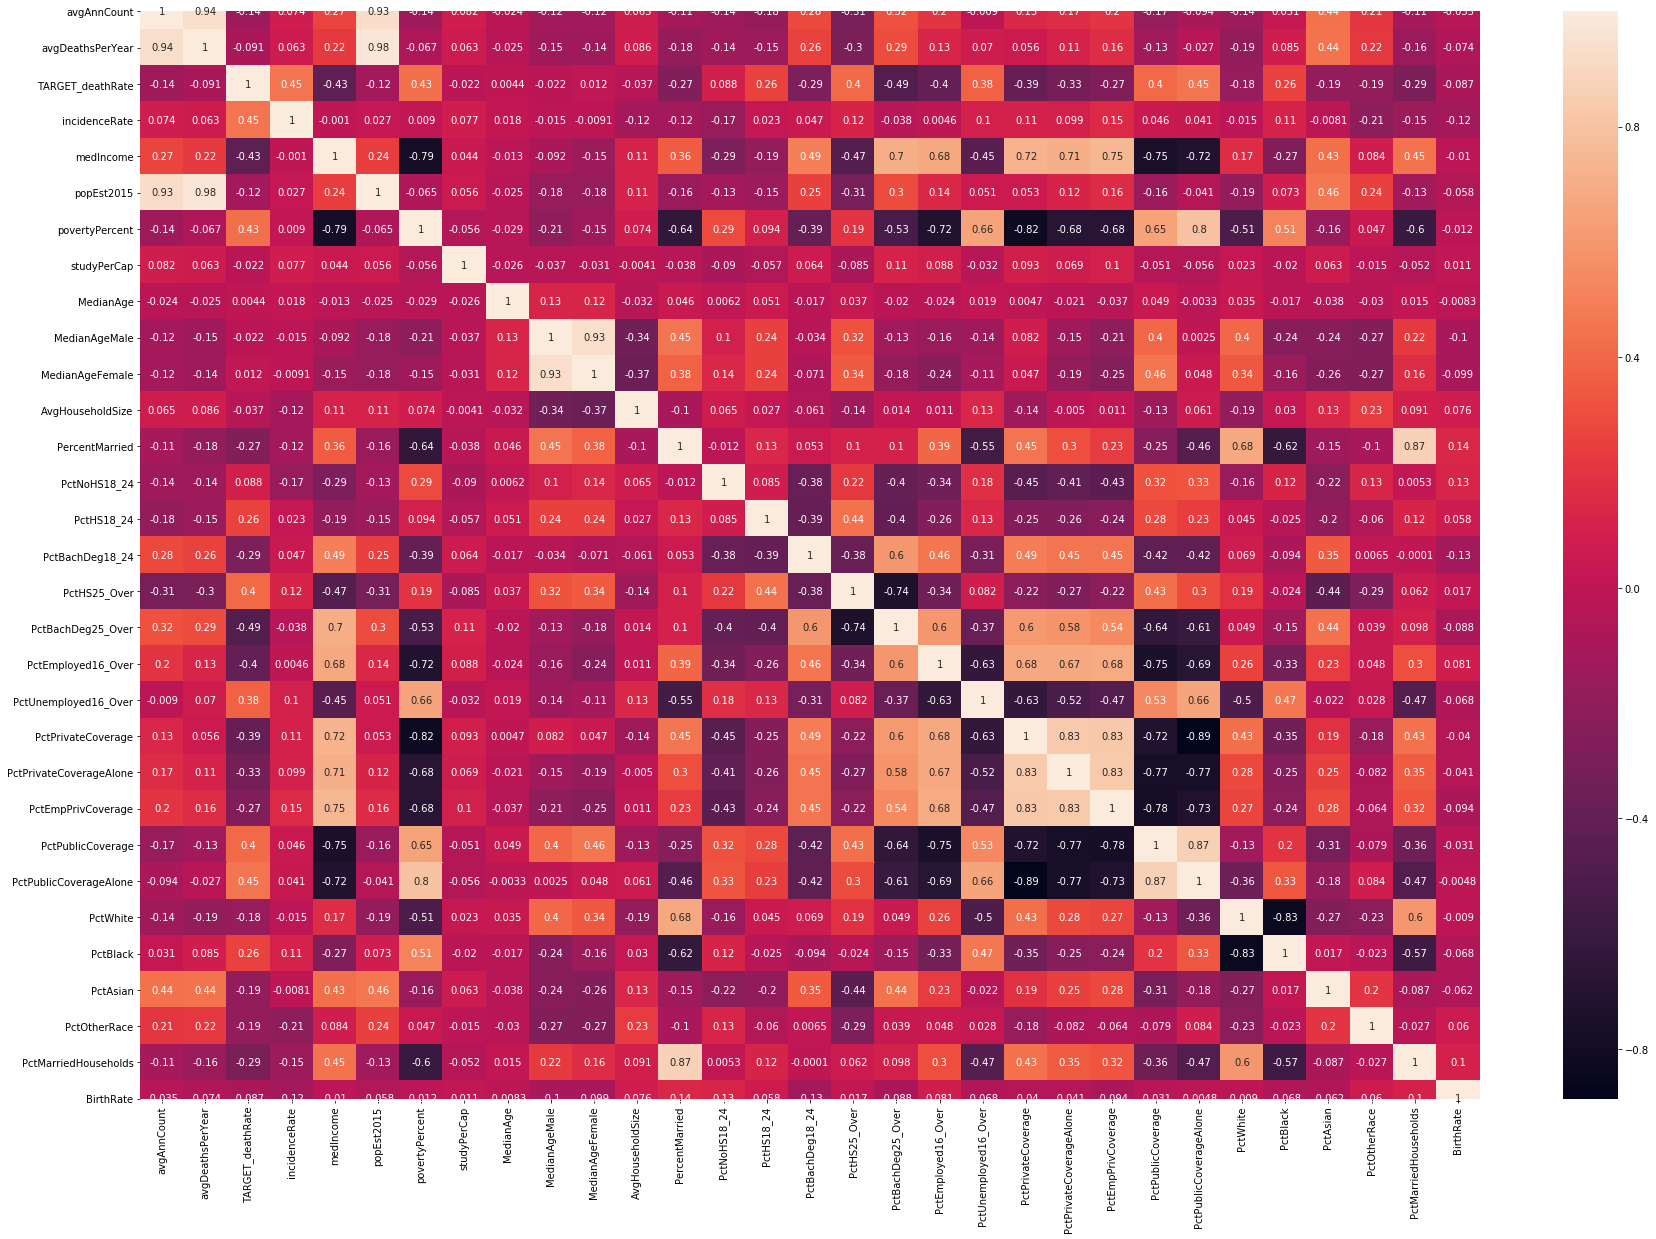

In [14]:
plt.figure(figsize=(30,20))
sns.heatmap(df.corr(),annot=True)
plt.show()

From here the top 10 columns which have higher correlation with TARGET_deathRate are:<br>
PctBachDeg25_Over  -0.49<br>
incidenceRate 		0.45<br>
povertyPercent 		0.45<br>
PctPublicCoverageAlone	0.45<br>
medIncome  		-0.43<br>
PctHS25_Over		0.4<br>
PctPublicCoverage		0.4<br>
PctEmployed16_Over		-0.4<br>
PctPrivateCoverage		-0.39<br>
PctUnemployed16_Over	0.38<br>

We will plot the scatter plots of these columns with TARGET_deathRate

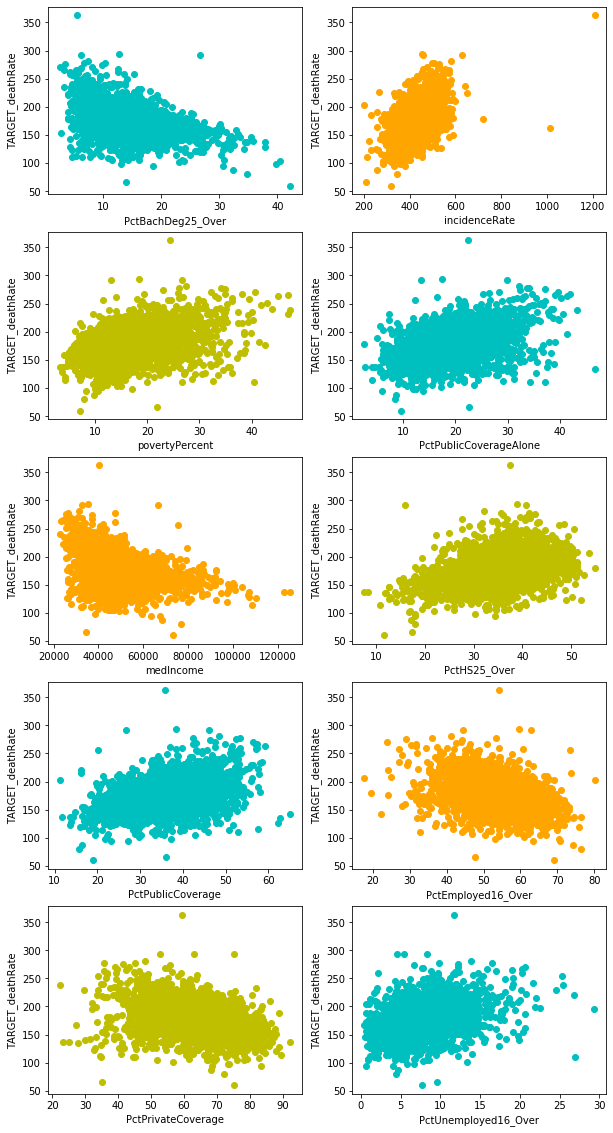

In [15]:
fig,axes = plt.subplots(nrows = 5, ncols = 2, figsize=(10,20))

axes[0,0].scatter(y = df['TARGET_deathRate'],x = df['PctBachDeg25_Over'],color = 'c')
axes[0,1].scatter(y = df['TARGET_deathRate'],x = df['incidenceRate'],color = 'orange')

axes[1,0].scatter(y = df['TARGET_deathRate'],x = df['povertyPercent'],color = 'y')
axes[1,1].scatter(y = df['TARGET_deathRate'],x = df['PctPublicCoverageAlone'],color = 'c')

axes[2,0].scatter(y = df['TARGET_deathRate'],x = df['medIncome'],color = 'orange')
axes[2,1].scatter(y = df['TARGET_deathRate'],x = df['PctHS25_Over'],color = 'y')

axes[3,0].scatter(y = df['TARGET_deathRate'],x = df['PctPublicCoverage'],color = 'c')
axes[3,1].scatter(y = df['TARGET_deathRate'],x = df['PctEmployed16_Over'],color = 'orange')

axes[4,0].scatter(y = df['TARGET_deathRate'],x = df['PctPrivateCoverage'],color = 'y')
axes[4,1].scatter(y = df['TARGET_deathRate'],x = df['PctUnemployed16_Over'],color = 'c')

i = 0
x_list = ['PctBachDeg25_Over','incidenceRate','povertyPercent','PctPublicCoverageAlone',
          'medIncome','PctHS25_Over','PctPublicCoverage','PctEmployed16_Over','PctPrivateCoverage','PctUnemployed16_Over']
for ax in axes.flat:
    ax.set(xlabel=x_list[i], ylabel='TARGET_deathRate')
    i += 1

### Although the relation isn't perfect, but we can see some linear pattern between these columns and the TARGET_deathRate

# Data Preparation

We will deal with the categorical variables first. As we have seen from df.info(), only Geography and binnedInc are categorical varibles

In [16]:
#Checking number of unique values in Geography column
print(df['Geography'].nunique())

3047


We see that there are 3047 unique values in the Geography column. This is equal to the number of rows our dataset has. Hence 'Geography' column is of no use to us. So we will drop it

In [17]:
#Dropping the 'Geography' column
df = df.drop('Geography',axis=1)

In [18]:
#Checking number of unique values in binnedInc column
print(df['binnedInc'].nunique())

10


binnedInc has 10 types of values, hence we will create dummy variables for representing these values 

In [19]:
#Creating dummy variables
dummy = pd.get_dummies(df['binnedInc'])
dummy.head()

,"(34218.1, 37413.8]","(37413.8, 40362.7]","(40362.7, 42724.4]","(42724.4, 45201]","(45201, 48021.6]","(48021.6, 51046.4]","(51046.4, 54545.6]","(54545.6, 61494.5]","(61494.5, 125635]","[22640, 34218.1]"
0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0


Out of these dummy variables, we can drop the 1st one ie (34218.1, 37413.8]. By doing so we are not losing any info, since all 0s in other 9 columns will represent this column

In [20]:
dummy = dummy.drop('(34218.1, 37413.8]',axis=1)
dummy.head()

,"(37413.8, 40362.7]","(40362.7, 42724.4]","(42724.4, 45201]","(45201, 48021.6]","(48021.6, 51046.4]","(51046.4, 54545.6]","(54545.6, 61494.5]","(61494.5, 125635]","[22640, 34218.1]"
0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,0,0,0
2,0,0,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0


In [21]:
#Concatinating this new data frame into our main datframe 
df = pd.concat([df, dummy], axis = 1)

In [22]:
df.head()

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,...,BirthRate,"(37413.8, 40362.7]","(40362.7, 42724.4]","(42724.4, 45201]","(45201, 48021.6]","(48021.6, 51046.4]","(51046.4, 54545.6]","(54545.6, 61494.5]","(61494.5, 125635]","[22640, 34218.1]"
0,1397.0,469,164.9,489.8,61898,260131,11.2,499.748204,"(61494.5, 125635]",39.3,...,6.118831,0,0,0,0,0,0,0,1,0
1,173.0,70,161.3,411.6,48127,43269,18.6,23.111234,"(48021.6, 51046.4]",33.0,...,4.333096,0,0,0,0,1,0,0,0,0
2,102.0,50,174.7,349.7,49348,21026,14.6,47.560164,"(48021.6, 51046.4]",45.0,...,3.729488,0,0,0,0,1,0,0,0,0
3,427.0,202,194.8,430.4,44243,75882,17.1,342.637253,"(42724.4, 45201]",42.8,...,4.603841,0,0,1,0,0,0,0,0,0
4,57.0,26,144.4,350.1,49955,10321,12.5,0.000000,"(48021.6, 51046.4]",48.3,...,6.796657,0,0,0,0,1,0,0,0,0


As we can see out data frame has all the new dummy variables now

Now we need to drop binnedInc, since its dummy variables have been created

In [23]:
#Dropping binnedInc
df = df.drop('binnedInc',axis=1)
df.head()

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,...,BirthRate,"(37413.8, 40362.7]","(40362.7, 42724.4]","(42724.4, 45201]","(45201, 48021.6]","(48021.6, 51046.4]","(51046.4, 54545.6]","(54545.6, 61494.5]","(61494.5, 125635]","[22640, 34218.1]"
0,1397.0,469,164.9,489.8,61898,260131,11.2,499.748204,39.3,36.9,...,6.118831,0,0,0,0,0,0,0,1,0
1,173.0,70,161.3,411.6,48127,43269,18.6,23.111234,33.0,32.2,...,4.333096,0,0,0,0,1,0,0,0,0
2,102.0,50,174.7,349.7,49348,21026,14.6,47.560164,45.0,44.0,...,3.729488,0,0,0,0,1,0,0,0,0
3,427.0,202,194.8,430.4,44243,75882,17.1,342.637253,42.8,42.2,...,4.603841,0,0,1,0,0,0,0,0,0
4,57.0,26,144.4,350.1,49955,10321,12.5,0.000000,48.3,47.8,...,6.796657,0,0,0,0,1,0,0,0,0


# Building a Model

## Splitting Data into Testing and Training Sets

In [24]:
from sklearn.model_selection import train_test_split

#We will split 70% data into training set and 30% data into testing set
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 96)

In [25]:
df_train.shape

(2132, 40)

In [26]:
df_test.shape

(915, 40)

In [27]:
df_train.shape[0]/len(df)*100

69.97046275024614

In [28]:
df_test.shape[0]/len(df)*100

30.029537249753858

We can clearly see that the data has been correctly divided into training and testing data in the ratio 70:30

## Rescaling the Features

Now we need to rescale the features, so that no feature can dominate unfairly over the other. So for this we will use Min Max Scaling which scales the data in such a way that all values lie between 0 and 1

In [29]:
#Importing MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

In [30]:
df.columns

Index(['avgAnnCount', 'avgDeathsPerYear', 'TARGET_deathRate', 'incidenceRate',
       'medIncome', 'popEst2015', 'povertyPercent', 'studyPerCap', 'MedianAge',
       'MedianAgeMale', 'MedianAgeFemale', 'AvgHouseholdSize',
       'PercentMarried', 'PctNoHS18_24', 'PctHS18_24', 'PctBachDeg18_24',
       'PctHS25_Over', 'PctBachDeg25_Over', 'PctEmployed16_Over',
       'PctUnemployed16_Over', 'PctPrivateCoverage', 'PctPrivateCoverageAlone',
       'PctEmpPrivCoverage', 'PctPublicCoverage', 'PctPublicCoverageAlone',
       'PctWhite', 'PctBlack', 'PctAsian', 'PctOtherRace',
       'PctMarriedHouseholds', 'BirthRate', '(37413.8, 40362.7]',
       '(40362.7, 42724.4]', '(42724.4, 45201]', '(45201, 48021.6]',
       '(48021.6, 51046.4]', '(51046.4, 54545.6]', '(54545.6, 61494.5]',
       '(61494.5, 125635]', '[22640, 34218.1]'],
      dtype='object')

In [31]:
#Putting all columns to be scaled in a list, so that MinMaxScaler() can work properly
scaling_columns = ['avgAnnCount', 'avgDeathsPerYear', 'TARGET_deathRate', 'incidenceRate',
       'medIncome', 'popEst2015', 'povertyPercent', 'studyPerCap', 'MedianAge',
       'MedianAgeMale', 'MedianAgeFemale', 'AvgHouseholdSize',
       'PercentMarried', 'PctNoHS18_24', 'PctHS18_24', 'PctBachDeg18_24',
       'PctHS25_Over', 'PctBachDeg25_Over', 'PctEmployed16_Over',
       'PctUnemployed16_Over', 'PctPrivateCoverage', 'PctPrivateCoverageAlone',
       'PctEmpPrivCoverage', 'PctPublicCoverage', 'PctPublicCoverageAlone',
       'PctWhite', 'PctBlack', 'PctAsian', 'PctOtherRace',
       'PctMarriedHouseholds', 'BirthRate', '(37413.8, 40362.7]',
       '(40362.7, 42724.4]', '(42724.4, 45201]', '(45201, 48021.6]',
       '(48021.6, 51046.4]', '(51046.4, 54545.6]', '(54545.6, 61494.5]',
       '(61494.5, 125635]', '[22640, 34218.1]']

#Scaling both the training and testing sets
df_train[scaling_columns] = MinMaxScaler().fit_transform(df_train[scaling_columns])
df_test[scaling_columns] = MinMaxScaler().fit_transform(df_test[scaling_columns])

In [32]:
df_train.head()

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,...,BirthRate,"(37413.8, 40362.7]","(40362.7, 42724.4]","(42724.4, 45201]","(45201, 48021.6]","(48021.6, 51046.4]","(51046.4, 54545.6]","(54545.6, 61494.5]","(61494.5, 125635]","[22640, 34218.1]"
371,0.126531,0.010386,0.300169,0.243472,0.290218,0.009331,0.235294,0.000000,0.020305,0.298329,...,0.403142,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1321,0.126531,0.001385,0.370658,0.243472,0.303539,0.000841,0.192308,0.000000,0.027689,0.326969,...,0.683541,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
919,0.002005,0.001731,0.158179,0.128439,0.262819,0.002290,0.219457,0.000000,0.018795,0.274463,...,0.407227,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2785,0.002716,0.003289,0.311636,0.154047,0.277722,0.001828,0.169683,0.000000,0.049505,0.677804,...,0.244091,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1158,0.042227,0.040679,0.339292,0.271741,0.317443,0.027535,0.133484,0.061158,0.030206,0.412888,...,0.280395,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [33]:
df_test.head()

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,...,BirthRate,"(37413.8, 40362.7]","(40362.7, 42724.4]","(42724.4, 45201]","(45201, 48021.6]","(48021.6, 51046.4]","(51046.4, 54545.6]","(54545.6, 61494.5]","(61494.5, 125635]","[22640, 34218.1]"
2071,0.000131,0.000214,0.623247,0.298561,0.278173,0.000092,0.144208,0.000000,0.046535,0.706587,...,0.343303,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1579,0.001049,0.001000,0.359566,0.240989,0.197587,0.000688,0.345154,0.000000,0.926209,0.772455,...,0.122859,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2779,0.001311,0.001642,0.608774,0.304958,0.210370,0.000930,0.262411,0.000000,0.029250,0.508982,...,0.112356,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2922,0.009412,0.010923,0.593397,0.336942,0.306975,0.005531,0.177305,0.016324,0.033904,0.577844,...,0.257425,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2942,0.003199,0.003855,0.574401,0.285890,0.311125,0.002526,0.198582,0.000000,0.028586,0.491018,...,0.190318,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


All the columns of training and testing data have been scaled properly

## Separating the target variable and independent variables

In [34]:
Y_train = df_train.pop('TARGET_deathRate')
X_train = df_train

Y_test = df_test.pop('TARGET_deathRate')
X_test = df_test

In [35]:
X_train.shape

(2132, 39)

Since there are 39 variables in X, it would be extremely inefficient for us to manually select the required features, or to manually eliminate the features. Therefore we will make the use of RFE (Recursive Feature Elimination) for this. It will automatically tell us the n best features to be selected, where we will choose the value of n

In [36]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [37]:
#Before using RFE, we will need to create a regression model first.
linear_model = LinearRegression()
linear_model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [38]:
# Running RFE with 10 variables
rfe = RFE(linear_model, 10) 
rfe = rfe.fit(X_train, Y_train)

In [39]:
#Printing all the columns along with their rank
print(pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)),columns = ['Feature','Selected','Rank']))

                    Feature  Selected  Rank
0               avgAnnCount      True     1
1          avgDeathsPerYear      True     1
2             incidenceRate      True     1
3                 medIncome     False    14
4                popEst2015      True     1
5            povertyPercent     False    30
6               studyPerCap     False    25
7                 MedianAge     False    28
8             MedianAgeMale     False     5
9           MedianAgeFemale     False    11
10         AvgHouseholdSize     False    26
11           PercentMarried     False     2
12             PctNoHS18_24     False    13
13               PctHS18_24     False     9
14          PctBachDeg18_24     False    18
15             PctHS25_Over     False     6
16        PctBachDeg25_Over      True     1
17       PctEmployed16_Over      True     1
18     PctUnemployed16_Over     False    29
19       PctPrivateCoverage     False     3
20  PctPrivateCoverageAlone     False    10
21       PctEmpPrivCoverage     

In [40]:
#Displaying all the selected columns
sel_col = X_train.columns[rfe.support_]
print(sel_col)
RFE_X_train = X_train[sel_col]
RFE_X_train.head()

Index(['avgAnnCount', 'avgDeathsPerYear', 'incidenceRate', 'popEst2015',
       'PctBachDeg25_Over', 'PctEmployed16_Over', 'PctPublicCoverage',
       'PctPublicCoverageAlone', 'PctOtherRace', 'PctMarriedHouseholds'],
      dtype='object')


,avgAnnCount,avgDeathsPerYear,incidenceRate,popEst2015,PctBachDeg25_Over,PctEmployed16_Over,PctPublicCoverage,PctPublicCoverageAlone,PctOtherRace,PctMarriedHouseholds
371,0.126531,0.010386,0.243472,0.009331,0.341398,0.806985,0.382739,0.350000,0.002797,0.446019
1321,0.126531,0.001385,0.243472,0.000841,0.373656,0.589203,0.288931,0.195455,0.194798,0.686705
919,0.002005,0.001731,0.128439,0.002290,0.193548,0.588235,0.311445,0.225000,0.010448,0.796784
2785,0.002716,0.003289,0.154047,0.001828,0.448925,0.579044,0.489681,0.259091,0.010797,0.650537
1158,0.042227,0.040679,0.271741,0.027535,0.365591,0.775735,0.345216,0.265909,0.026617,0.547954


We will only make the model with these features now

In [41]:
import statsmodels.api as sm  

#Adding a constant as an attribute, since sm creates line passing through Origin by default
RFE_X_train = sm.add_constant(RFE_X_train)

#Fitting the model
linear_model = sm.OLS(Y_train,RFE_X_train).fit()

In [42]:
print(linear_model.summary())

                            OLS Regression Results                            
Dep. Variable:       TARGET_deathRate   R-squared:                       0.506
Model:                            OLS   Adj. R-squared:                  0.503
Method:                 Least Squares   F-statistic:                     217.0
Date:                Wed, 12 Aug 2020   Prob (F-statistic):          1.14e-315
Time:                        00:53:04   Log-Likelihood:                 2788.2
No. Observations:                2132   AIC:                            -5554.
Df Residuals:                    2121   BIC:                            -5492.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

Here the p values of all the features is less than 0.05. Hence all of the features are significant.<br>
Now we will check the VIFs(Variance Inflation Factor) of all the columns, to see if there is correlation in between the features.

In [43]:
#Importing VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Creating VIF dataframe
VIF = pd.DataFrame()

#Features will be same in both
VIF['Features'] = RFE_X_train.columns

#Calculating VIF and storing it in the dataframe
VIF['VIF'] = [variance_inflation_factor(RFE_X_train.values, i) for i in range(RFE_X_train.shape[1])]
#Rounding the value, for better readability
VIF['VIF'] = round(VIF['VIF'], 3)

#Sorting the dataframe by descending values of VIF
VIF = VIF.sort_values(by = "VIF", ascending = False)

print(VIF)

                  Features      VIF
0                    const  192.316
2         avgDeathsPerYear   23.817
4               popEst2015   21.074
1              avgAnnCount    6.645
8   PctPublicCoverageAlone    5.764
7        PctPublicCoverage    5.761
6       PctEmployed16_Over    2.568
5        PctBachDeg25_Over    2.190
10    PctMarriedHouseholds    1.498
9             PctOtherRace    1.228
3            incidenceRate    1.138


Since the VIF of const is extremely high, we will remove it from the model

In [44]:
#Dropping const from the training data
RFE_X_train = RFE_X_train.drop('const',axis=1)

In [45]:
#Fitting the model again
linear_model_2 = sm.OLS(Y_train,RFE_X_train).fit()

#Printing the summary of the new model
print(linear_model_2.summary())

                                 OLS Regression Results                                
Dep. Variable:       TARGET_deathRate   R-squared (uncentered):                   0.967
Model:                            OLS   Adj. R-squared (uncentered):              0.967
Method:                 Least Squares   F-statistic:                              6309.
Date:                Wed, 12 Aug 2020   Prob (F-statistic):                        0.00
Time:                        00:53:05   Log-Likelihood:                          2634.6
No. Observations:                2132   AIC:                                     -5249.
Df Residuals:                    2122   BIC:                                     -5193.
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------

Calculating VIF for the new model

In [46]:
VIF2 = pd.DataFrame()

VIF2['Features'] = RFE_X_train.columns

VIF2['VIF'] = [variance_inflation_factor(RFE_X_train.values, i) for i in range(RFE_X_train.shape[1])]

VIF2['VIF'] = round(VIF2['VIF'], 3)

VIF2 = VIF2.sort_values(by = "VIF", ascending = False)

print(VIF2)

                 Features     VIF
6       PctPublicCoverage  51.661
7  PctPublicCoverageAlone  43.803
5      PctEmployed16_Over  28.658
1        avgDeathsPerYear  28.139
3              popEst2015  24.103
2           incidenceRate  19.338
9    PctMarriedHouseholds  18.780
4       PctBachDeg25_Over   9.626
0             avgAnnCount   8.092
8            PctOtherRace   1.588


Now since VIF and p value of PctPublicCoverage is high we will drop it.

In [47]:
RFE_X_train = RFE_X_train.drop('PctPublicCoverage',axis=1)

linear_model_3 = sm.OLS(Y_train,RFE_X_train).fit()

#Printing the summary of the new model
print(linear_model_3.summary())

                                 OLS Regression Results                                
Dep. Variable:       TARGET_deathRate   R-squared (uncentered):                   0.967
Model:                            OLS   Adj. R-squared (uncentered):              0.967
Method:                 Least Squares   F-statistic:                              7008.
Date:                Wed, 12 Aug 2020   Prob (F-statistic):                        0.00
Time:                        00:53:05   Log-Likelihood:                          2633.8
No. Observations:                2132   AIC:                                     -5250.
Df Residuals:                    2123   BIC:                                     -5199.
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------

In [48]:
VIF3 = pd.DataFrame()

VIF3['Features'] = RFE_X_train.columns

VIF3['VIF'] = [variance_inflation_factor(RFE_X_train.values, i) for i in range(RFE_X_train.shape[1])]

VIF3['VIF'] = round(VIF3['VIF'], 3)

VIF3 = VIF3.sort_values(by = "VIF", ascending = False)

print(VIF3)

                 Features     VIF
1        avgDeathsPerYear  27.660
5      PctEmployed16_Over  27.645
3              popEst2015  22.867
2           incidenceRate  19.110
8    PctMarriedHouseholds  16.145
4       PctBachDeg25_Over   9.563
0             avgAnnCount   7.999
6  PctPublicCoverageAlone   7.858
7            PctOtherRace   1.529


Since avgDeathsPerYear has high VIF value, we will remove it

In [49]:
RFE_X_train = RFE_X_train.drop('avgDeathsPerYear',axis=1)

linear_model_4 = sm.OLS(Y_train,RFE_X_train).fit()

#Printing the summary of the new model
print(linear_model_4.summary())

                                 OLS Regression Results                                
Dep. Variable:       TARGET_deathRate   R-squared (uncentered):                   0.967
Model:                            OLS   Adj. R-squared (uncentered):              0.967
Method:                 Least Squares   F-statistic:                              7821.
Date:                Wed, 12 Aug 2020   Prob (F-statistic):                        0.00
Time:                        00:53:05   Log-Likelihood:                          2625.1
No. Observations:                2132   AIC:                                     -5234.
Df Residuals:                    2124   BIC:                                     -5189.
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------

In [50]:
VIF4 = pd.DataFrame()

VIF4['Features'] = RFE_X_train.columns

VIF4['VIF'] = [variance_inflation_factor(RFE_X_train.values, i) for i in range(RFE_X_train.shape[1])]

VIF4['VIF'] = round(VIF4['VIF'], 3)

VIF4 = VIF4.sort_values(by = "VIF", ascending = False)

print(VIF4)

                 Features     VIF
4      PctEmployed16_Over  27.515
1           incidenceRate  18.781
7    PctMarriedHouseholds  16.015
3       PctBachDeg25_Over   9.555
5  PctPublicCoverageAlone   7.791
0             avgAnnCount   6.700
2              popEst2015   6.376
6            PctOtherRace   1.515


Since PctEmployed16_Over has high VIF value, we will drop it and make the model again

In [51]:
RFE_X_train = RFE_X_train.drop('PctEmployed16_Over',axis=1)

linear_model_5 = sm.OLS(Y_train,RFE_X_train).fit()

#Printing the summary of the new model
print(linear_model_5.summary())

VIF5 = pd.DataFrame()

VIF5['Features'] = RFE_X_train.columns

VIF5['VIF'] = [variance_inflation_factor(RFE_X_train.values, i) for i in range(RFE_X_train.shape[1])]

VIF5['VIF'] = round(VIF5['VIF'], 3)

VIF5 = VIF5.sort_values(by = "VIF", ascending = False)

print(VIF5)

                                 OLS Regression Results                                
Dep. Variable:       TARGET_deathRate   R-squared (uncentered):                   0.967
Model:                            OLS   Adj. R-squared (uncentered):              0.966
Method:                 Least Squares   F-statistic:                              8781.
Date:                Wed, 12 Aug 2020   Prob (F-statistic):                        0.00
Time:                        00:53:05   Log-Likelihood:                          2606.3
No. Observations:                2132   AIC:                                     -5199.
Df Residuals:                    2125   BIC:                                     -5159.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------

### Now VIF of every model is below a acceptable value of 20. Since if we try to decrease it more it will affect the p values Hence we will accept this model as the final model
### The Adjusted R - squared value of this model is 0.966

# Residual/Error term Analysis

In [52]:
Y_train_pred = linear_model_5.predict(RFE_X_train)

Text(0.5, 0, 'Errors')

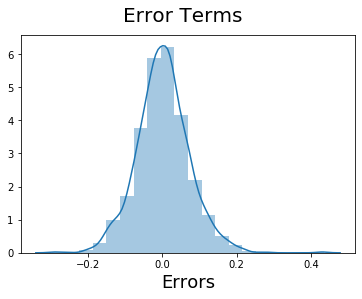

In [53]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((Y_train - Y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

# Making Predictions

In [54]:
#Now we need to have only those columns in X_test which are in RFE_X_train
X_test = X_test[RFE_X_train.columns]

In [55]:
Y_test_pred = linear_model_5.predict(X_test)

Text(0, 0.5, 'Y_test_pred')

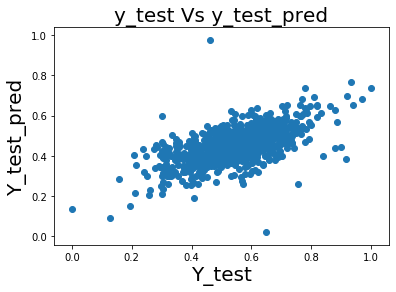

In [56]:
# Lastly we are gooing to plot y_test against y_pred to understand the spread.
plt.scatter(Y_test,Y_test_pred)
plt.title('y_test Vs y_test_pred', fontsize=20)            #Title
plt.xlabel('Y_test', fontsize=20)                          # X-label
plt.ylabel('Y_test_pred', fontsize=20)                     # Y-label

## We can observe a fairly linear relationship between Y_test and Y_test_pred, hence we can conclude that this model works well.